In [24]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator 
tf.__version__ 

'1.13.1'

# Data Preprocessing

In [ ]:
#Now let us start with the Data Preprocessing. Let's start with image augmentation by tranforming images in the
#training set to not overlearn.

In [27]:
#train datagen is an instance of this image data generator class
#That we need to tranform the training set. 


train_datagen = ImageDataGenerator(rescale = 1./255, #this will apply feature scaling to each single pixel by 
                                   #dividingtheir value by 255 know that each pixel takes a value between 0 and 255 
                                   #So by dividin all of them by 255, we get pixel values between 0 and 255. 
                                   #Similar
                                   #to normalisation. 
                                   
                                   
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

#So we take our "train_datagen" object which is the instance of the image data generator class. And from here we're
# gonna call a method of this class "the ImageDataGenerator".
training_set = train_datagen.flow_from_directory('training_set', #Now let's create a target size. 
                                              target_size = (64, 64), #this will be fed thru the CNN
                                              batch_size = 32,#Batch size means how many images you have in each batch, 
                                                  #32 is a default value.
                                              
                                              class_mode = 'binary') #class_mode is binary or categorical. 


Found 279 images belonging to 2 classes.


In [28]:
test_datagen = ImageDataGenerator(rescale = 1./255)
#This is similar to what we did for the train set, but we are not doing any sort of transformation.
#It is quite similar to model deployment on actual pictures after we have our model ready. 
test_set = test_datagen.flow_from_directory('test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 70 images belonging to 2 classes.


# Building the CNN

In [29]:
cnn = tf.keras.models.Sequential() #Sequential class
#here we are calling the CNN as a sequential layers. 


#FIRST CONVOLUTIONAL LAYER

#Let's make a Convolutional layer of a Conv2D class which builds a fully connected layer is from the same module
#from Keras Library


cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

# filters are the # of feature detectors like blur or sharpen. 
# kernel size is the size of this feature detector.
# activation ____
#input_shape for us in 3D for RGB images that we have. We resized our images to 64 by 64, input shape has to 
#     also be 64 by 64. For Black and white images this 3 would be a 1. 




#OKAY, let's take now a MaxPOOL2D class this time.
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

#POOL_SIZE is the parameter which reflects the size that is being MaxPooled in feature map by taking 
#the highest pixel value. 

#Remember, Max Pool downsizes from feature map to pooled feature map which reduces 

# STRIDE is the amount of shift of the filter in a given direction, speaking in terms of pixels.

In [30]:
# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# UNITS is the number of hidden neurons and the activation would be relu, pretty standard in CNN. 

# Step 5 - Output Layer
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
# Unit is one for a binary classification so we also except one output from our densly conneccted NN. 

#Sigmoid is fine for a binary classification, for a multiclass we would be softmax activation. 

In [63]:
# Compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


# Training the CNN on the Training set and evaluating it on the Test set
history = cnn.fit(x = training_set, validation_data = test_set, epochs = 100)


Epoch 1/100
9/9 [==============================] - 5s 564ms/step - loss: 0.4187 - acc: 0.7885 - val_loss: 0.5854 - val_acc: 0.7143
Epoch 2/100
9/9 [==============================] - 4s 461ms/step - loss: 0.2444 - acc: 0.8961 - val_loss: 0.7489 - val_acc: 0.6571
Epoch 3/100
9/9 [==============================] - 4s 476ms/step - loss: 0.2311 - acc: 0.9247 - val_loss: 0.8993 - val_acc: 0.6429
Epoch 4/100
9/9 [==============================] - 5s 500ms/step - loss: 0.1859 - acc: 0.9319 - val_loss: 0.9418 - val_acc: 0.6571
Epoch 5/100
9/9 [==============================] - 4s 476ms/step - loss: 0.1806 - acc: 0.9319 - val_loss: 1.0338 - val_acc: 0.6429
Epoch 6/100
9/9 [==============================] - 4s 466ms/step - loss: 0.1806 - acc: 0.9355 - val_loss: 1.0265 - val_acc: 0.6286
Epoch 7/100
9/9 [==============================] - 4s 451ms/step - loss: 0.1540 - acc: 0.9427 - val_loss: 1.3535 - val_acc: 0.5571
Epoch 8/100
9/9 [==============================] - 4s 456ms/step - loss: 0.1888 - a

9/9 [==============================] - 4s 454ms/step - loss: 0.0369 - acc: 0.9892 - val_loss: 1.4191 - val_acc: 0.6143
Epoch 40/100
9/9 [==============================] - 4s 453ms/step - loss: 0.0308 - acc: 0.9928 - val_loss: 1.7976 - val_acc: 0.6143
Epoch 41/100
9/9 [==============================] - 4s 454ms/step - loss: 0.0322 - acc: 0.9928 - val_loss: 1.5196 - val_acc: 0.6286
Epoch 42/100
9/9 [==============================] - 4s 464ms/step - loss: 0.0496 - acc: 0.9857 - val_loss: 1.4495 - val_acc: 0.6286
Epoch 43/100
9/9 [==============================] - 4s 439ms/step - loss: 0.0390 - acc: 0.9892 - val_loss: 1.1045 - val_acc: 0.6857
Epoch 44/100
9/9 [==============================] - 4s 469ms/step - loss: 0.0211 - acc: 0.9964 - val_loss: 0.9738 - val_acc: 0.7429
Epoch 45/100
9/9 [==============================] - 4s 465ms/step - loss: 0.0208 - acc: 1.0000 - val_loss: 0.9701 - val_acc: 0.7714
Epoch 46/100
9/9 [==============================] - 4s 451ms/step - loss: 0.0318 - acc: 0

9/9 [==============================] - 4s 491ms/step - loss: 0.1088 - acc: 0.9785 - val_loss: 0.9365 - val_acc: 0.7286
Epoch 78/100
9/9 [==============================] - 4s 493ms/step - loss: 0.0918 - acc: 0.9713 - val_loss: 0.9164 - val_acc: 0.7000
Epoch 79/100
9/9 [==============================] - 4s 474ms/step - loss: 0.0502 - acc: 0.9892 - val_loss: 1.0617 - val_acc: 0.6429
Epoch 80/100
9/9 [==============================] - 4s 438ms/step - loss: 0.0573 - acc: 0.9892 - val_loss: 0.9645 - val_acc: 0.7000
Epoch 81/100
9/9 [==============================] - 4s 482ms/step - loss: 0.0272 - acc: 0.9928 - val_loss: 0.9792 - val_acc: 0.7429
Epoch 82/100
9/9 [==============================] - 4s 491ms/step - loss: 0.0394 - acc: 0.9928 - val_loss: 0.9634 - val_acc: 0.7571
Epoch 83/100
9/9 [==============================] - 4s 496ms/step - loss: 0.0159 - acc: 1.0000 - val_loss: 1.0209 - val_acc: 0.7571
Epoch 84/100
9/9 [==============================] - 4s 484ms/step - loss: 0.0190 - acc: 0

In [32]:
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total para

In [46]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('actual_prediction/Boris_Trump.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0) #the batch dimension would be the first dimension

#Now let's have your prediction of an image using this model. 
result = cnn.predict(test_image) 
training_set.class_indices #calling the attribute class_indices we get boris corresponds to 1 and donald 0. 


if result[0][0] == 1: # The result also has a batch dimension for [0] is the index [0] for a single image.
    prediction = 'Donald Trump'
else:
    prediction = 'Boris Johnson'
    
print(prediction) # This prouduces a single prediction for a given image usin CNN. 

Donald Trump


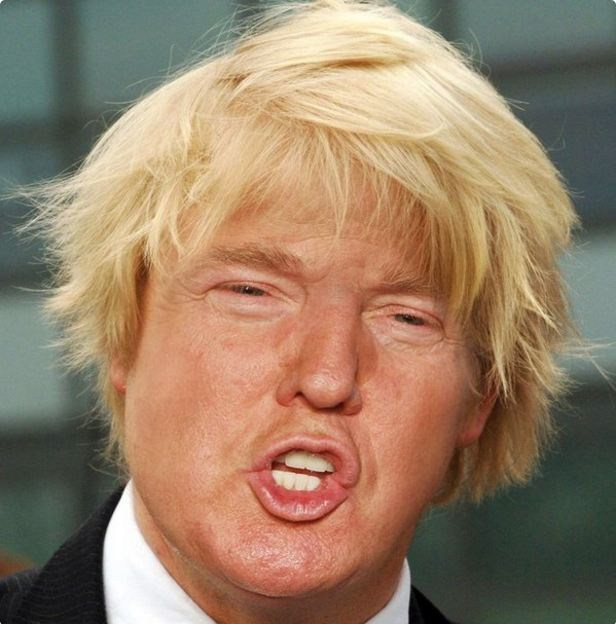

In [47]:
from IPython.display import Image
Image(filename = 'actual_prediction/Boris_Trump.jpg')

In [65]:
history.history['loss']

[0.42224231704161586,
 0.2443384332148405,
 0.22995806359902932,
 0.1869073299737814,
 0.17991500014045333,
 0.1830301183846689,
 0.15389371639297855,
 0.18602778738544834,
 0.17116114336957214,
 0.13714871130963807,
 0.14122190294406747,
 0.12197462952692449,
 0.10221192465033582,
 0.09867785302221134,
 0.13940997897083188,
 0.10133665749355883,
 0.09419981713363347,
 0.11521753218812754,
 0.13852429320521678,
 0.08207853165151398,
 0.07554387362627146,
 0.11826370840751997,
 0.06573443803735958,
 0.10808100444548446,
 0.12900930886093434,
 0.14616025675849248,
 0.11349186787254921,
 0.09272210652469307,
 0.06332685026643951,
 0.06749540166829222,
 0.05306800003547395,
 0.04479991679336862,
 0.04596955912675054,
 0.06153864114408425,
 0.04559633492301869,
 0.03931256595958946,
 0.031110664846302146,
 0.03391762268078584,
 0.0371094850496152,
 0.031059753510259813,
 0.03236840507783343,
 0.04817530705082801,
 0.03736970122356141,
 0.02125776883575224,
 0.020892139858028794,
 0.03224508

In [66]:
x = list(range(100))

In [67]:
print(x)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


In [68]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('actual_prediction/Boris_or_Trump.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'Donald'
else:
    prediction = 'Boris'
print(prediction)


Boris


In [ ]:
from IPython.display import Image
Image(filename = 'actual_prediction/Boris_or_Trump.jpg')

Text(0, 0.5, 'Loss')

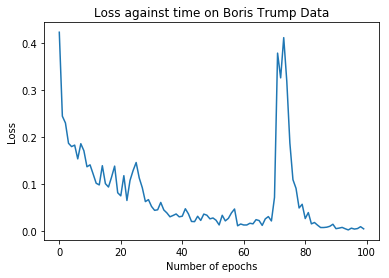

In [69]:
import matplotlib.pyplot as plt

plt.plot(x, history.history['loss'])
plt.title('Loss against time on Boris Trump Data')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')

In [62]:
loss_train = history.history['train_loss']
loss_val = history.history['val_loss']
epochs = range(1,26)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

KeyError: 'train_loss'

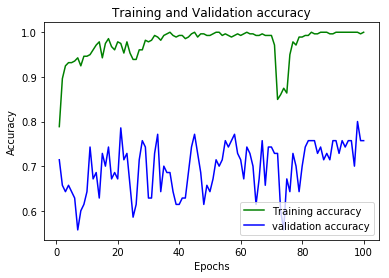

In [64]:
loss_train = history.history['acc']
loss_val = history.history['val_acc']
epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()